In [96]:
import pandas as pd

# Load data
table_df = pd.read_csv('CasusData.csv')
table_df.shape   #find dimension of data frame
table_df.head()  #show the 1st five rows
table_df = table_df.dropna()
print(table_df)  #show all the data

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP520 

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming 'table_df' is your original DataFrame

# Dummy encode categorical variables
table_df_lr = pd.get_dummies(table_df, prefix_sep='_', drop_first=True)

# Specify columns to exclude from predictors
excludeColumns_lr = ('FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP')

# Select predictors and outcome variable
predictors_lr = [s for s in table_df_lr.columns if s not in excludeColumns_lr]
outcome_lr = 'SPACEID'  # Change to 'LATITUDE', 'LONGITUDE', or any other variable

x_lr = table_df_lr[predictors_lr]
y_lr = table_df_lr[outcome_lr]

# Split data into training and validation sets
train_x_lr, valid_X_lr, train_y_lr, valid_y_lr = train_test_split(x_lr, y_lr, test_size=0.15, random_state=1)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(train_x_lr, train_y_lr)

# Make predictions on the training set
train_pred_lr = model.predict(train_x_lr)

# Create the train_results DataFrame
train_results_lr = pd.DataFrame({
    'SPACEID': train_y_lr,
    'Predicted SPACEID': train_pred_lr,
    'Residual': train_y_lr - train_pred_lr
})

print("Linear Regression - Training Set:")
print(train_results_lr.head())

# Make predictions on the validation set
valid_pred_lr = model.predict(valid_X_lr)

# Create the validation_results DataFrame
valid_results_lr = pd.DataFrame({
    'SPACEID': valid_y_lr,
    'Predicted SPACEID': valid_pred_lr,
    'Residual': valid_y_lr - valid_pred_lr
})

print("\nLinear Regression - Validation Set:")
print(valid_results_lr.head())


Linear Regression - Training Set:
       SPACEID  Predicted SPACEID   Residual
828        204         200.769531   3.230469
14431      103         103.052734  -0.052734
5480       202         154.488281  47.511719
19314       12         103.839844 -91.839844
10303      220         217.019531   2.980469

Linear Regression - Validation Set:
       SPACEID  Predicted SPACEID   Residual
7107       103         113.132812 -10.132812
12603      104          80.501953  23.498047
19424        4          59.115234 -55.115234
12850       13          28.857422 -15.857422
11311      102         118.867188 -16.867188


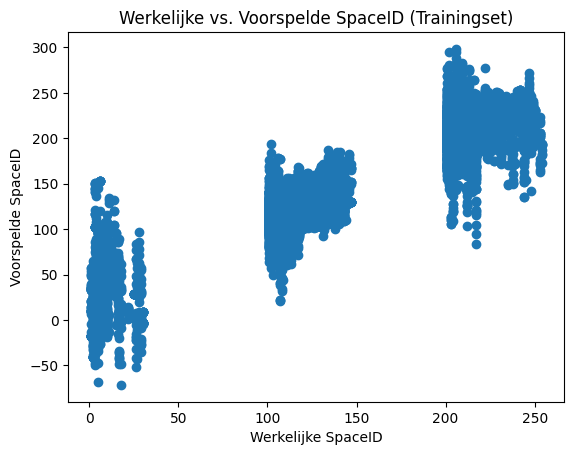

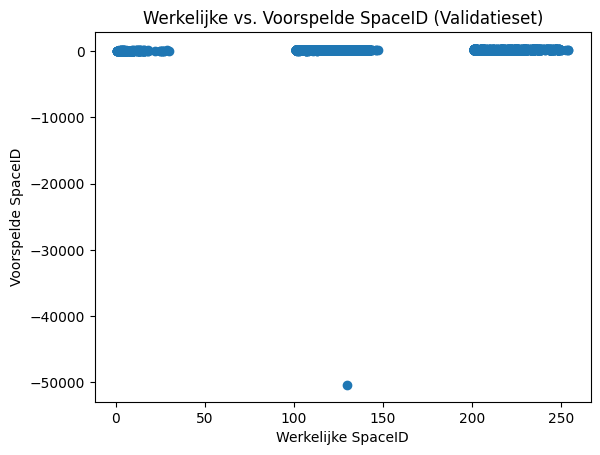

In [98]:
import matplotlib.pyplot as plt

plt.scatter(train_y_lr, train_pred_lr)
plt.xlabel('Werkelijke SpaceID')
plt.ylabel('Voorspelde SpaceID')
plt.title('Werkelijke vs. Voorspelde SpaceID (Trainingset)')
plt.show()
plt.scatter(valid_y_lr, valid_pred_lr)
plt.xlabel('Werkelijke SpaceID')
plt.ylabel('Voorspelde SpaceID')
plt.title('Werkelijke vs. Voorspelde SpaceID (Validatieset)')
plt.show()

In [102]:
# Identificeer uitschieters waarbij de absolute waarde van de restwaarde groot is
outliers = valid_results_lr[np.abs(valid_results_lr['Residual']) > 40]

# Toon de uitschieters
print(outliers)

       SPACEID  Predicted SPACEID   Residual
19424        4          59.115234 -55.115234
14868      235         191.716797  43.283203
8349       109         149.359375 -40.359375
1480         7          58.365234 -51.365234
4005       202         244.013672 -42.013672
...        ...                ...        ...
6499       211         163.443359  47.556641
3874       204         143.769531  60.230469
4137       210         250.435547 -40.435547
6131       204         162.148438  41.851562
4908       113         154.363281 -41.363281

[190 rows x 3 columns]
